In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
%%bash

ls *.csv

simpsons_characters.csv
simpsons_episodes.csv
simpsons_locations.csv
simpsons_script_lines.csv


In [18]:
characters = pd.read_csv("./simpsons_characters.csv")

In [20]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
id                 6722 non-null int64
name               6722 non-null object
normalized_name    6722 non-null object
gender             323 non-null object
dtypes: int64(1), object(3)
memory usage: 210.1+ KB


In [22]:
episodes = pd.read_csv("./simpsons_episodes.csv")

In [24]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
id                        600 non-null int64
title                     600 non-null object
original_air_date         600 non-null object
production_code           600 non-null object
season                    600 non-null int64
number_in_season          600 non-null int64
number_in_series          600 non-null int64
us_viewers_in_millions    594 non-null float64
views                     596 non-null float64
imdb_rating               597 non-null float64
imdb_votes                597 non-null float64
image_url                 596 non-null object
video_url                 596 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 61.0+ KB


In [26]:
episodes.sort_values(by="views", ascending=False).head()

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
241,1,Simpsons Roasting on an Open Fire,1989-12-17,7G08,1,1,1,26.7,171408.0,8.2,3734.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/273376835817
221,16,Treehouse of Horror,1990-10-25,7F04,2,3,16,27.4,130282.0,8.2,1786.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260538435884
533,109,Treehouse of Horror V,1994-10-30,2F03,6,6,109,22.2,119295.0,9.0,1690.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/299597891663
50,134,Treehouse of Horror VI,1995-10-29,3F04,7,6,134,19.7,110342.0,8.5,1304.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/310404163601
252,86,Treehouse of Horror IV,1993-10-28,1F04,5,5,86,24.0,110251.0,8.7,1437.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/275206211805


In [30]:
episodes.sort_values(by="imdb_rating", ascending=False).head()

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
537,176,Homer's Enemy,1997-05-04,4F19,8,23,176,11.8,74177.0,9.2,2256.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/436466755640
535,155,You Only Move Twice,1996-11-03,3F23,8,2,155,13.9,79609.0,9.2,2439.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/306390595776
323,179,The City of New York vs. Homer Simpson,1997-09-21,4F22,9,1,179,10.5,62962.0,9.1,1918.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/436516931611
534,128,Who Shot Mr. Burns? (Part One),1995-05-21,2F16,6,25,128,15.0,86070.0,9.1,1619.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/294781507859
261,76,Last Exit to Springfield,1993-03-11,9F15,4,17,76,22.4,71907.0,9.0,1827.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/357630019692


In [54]:
%%markdown

## Correlation between views and imdb rating


## Correlation between views and imdb rating

In [87]:
episodes.views.corr(episodes.imdb_rating)

0.5755122048821844

In [88]:
%%markdown

## Change in episode rating as time passed


## Change in episode rating as time passed

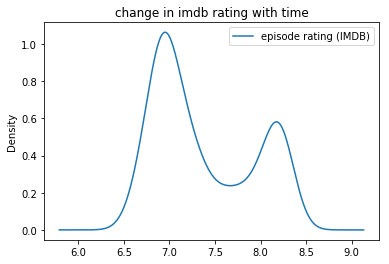

In [108]:
x = episodes.imdb_rating

x.index = episodes.original_air_date

x.name = "episode rating (IMDB)"

x.rolling(30)\
    .mean()\
    .dropna()\
    .plot\
    .kde(title="change in imdb rating with time",
        legend=True, use_index=True)

plt.show()